# Закономерности определяющие успешность игр 

## Описание

**Название проекта**: "Закономерности определяющие успешность игр" 

**Цель исследования**: выявить определяющие успешность игры закономерности, дать рекомендации по закупке игр и для планирувания рекламных компаний.  


**План исследования**:
Чтобы добиться поставленой цели 
1. Изучим данные на предмет того:
    - сколько игр выпускалось в разные годы
    - как менялись продажи по платформам
    - какие платформы лидируют по продажам
    - как распределилсь доли продажи игр в разбивке по платформам;
    - как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
    - распределены игры по жанрам.
2. Проверим гипотезы
3. Выясним существуют ли региональные предпочтения 
4. Резюмируем полученную информацию
   
**Исходные данные**:  
Интернет-магазин «Стримчик»продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно отработать принцип работы с данными и проверить гипотезы:   
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Особенности:
1. Даны данные до 2016 года и мы планируем кампанию на 2017-й.
2. Данные за 2016 год могут быть неполными.
3. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
и т.ди:

**Ход иследования**

Исследование состоит из нескольких частей, в конце исследования приводится общий вывод и даются рекомендации.

Часть 1. Изучение общей информации и подготовка данных  
- Загрузка библиотек, обзор данных, получение общей информации  
- Нахождение и ликвидация пропусков, ошибок, аномалий  
- Приведение данных к нужным типам

Часть 2. Исследовательский анализ  
- Нахождение актуального периода  
- Формирование срезов и расчетов  
- Визуализация изысканий

Часть 3.Портрет пользователя для регионов  
- Региональная специфики по платформам  
- Жанровые предпочтения  
- Исследования влияния рейтинга ESRB

Часть 4. Проверка гипотез  


## 1. Изучение общей информации и подготовка данных

Импортирyем необходимые для анализа библиотеки и загрущим данные в датафрейм.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('C:/Users/iamst/Downloads/games.csv')
    
except:
    df = pd.read_csv('/datasets/games.csv')

Просмотрим основную информацию о данных.

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру.

In [4]:
df = df.rename(columns=str.lower)
df.columns.values 

array(['name', 'platform', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating'], dtype=object)

Просмотрим основную информацию о данных.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


К каким типам должны относиться данные:  

'name', 'platform', 'genre', 'rating' - тип данных корректный для строковых значений.  
'na_sales','eu_sales', 'jp_sales', 'other_sales' - тип данных корректный для значений исчисляемых в миллионах копий.  

'year_of_release' - нужно привести к целочисленным значениям, в тип int привести не получится, пока в колонке есть Nan значения.  
'user_score' - нужно привести к float, среди числовых значений есть Nan и 'tbd'.

Проверим проценты пропущенных значений.

In [6]:
df.isna().sum()/len(df)

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Проверим на наличие полных дубликатов в датафрейме и на наличие неявных дубликатов по паре - название и платформа.

In [7]:
display(df.duplicated().sum())
df.duplicated(subset=['name', 'platform']).sum()

0

5

Поскольку дубликатов всего 5, можем рассмотреть  и принять решение по каждому.

In [8]:
df[df.duplicated(subset=['name', 'platform'])].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN


Из свободных источников мы выяснили, что релизы игры Madden NFL 13 состоялись в несколько дней и на нескольких платформах:
NA - AAugust 28, 2012 (PS3, X360)
Asia - August 28, 2012 (PS3, Vita, X360)
EU - August 31, 2012 (PS3, X360)
Мы предполагаем, что именно из-за разных дней данные задублировали для региона eu_sales. Складывать продажи не считаем правильным, тк они уже могут быть учтены в другой строке. Удалим эти данные из датафрейма.

In [9]:
df.query('name=="Madden NFL 13" and platform=="PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Из открытых источников мы знаем, что вы ход PS3 состоялся 2006-2007 годах, Sonic the Hedgehog  — видеоигра 1991 года для консоли Genesis, Sonic the Hedgehog также известна как Sonic 2006 — видеоигра 2006 года. Таким образом, мы приходим к выводу, что 1991 и 2006 это действительно разные игры. Заменил название "Sonic the Hedgehog" на "Sonic the Hedgehog 1", чтобы внести ясность и сохранить данные.

In [10]:
df[df['name'].str.contains('Sonic the Hedgehog', na=False)].sort_values(by='year_of_release') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
13571,Sonic the Hedgehog 2 (8-bit),GG,1992.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Игра Need for Speed: Most Wanted 2012 года является перезапуском Need for Speed: Most Wanted 2005 года.

In [11]:
df.query('name=="Need for Speed: Most Wanted" and platform in ("X360", "PC")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


Рассмотрим более подробно отсутсвующие значения в колонке "name" -2. Как мы видим по остальным колонкам - информации кране мало и игра вышла очень давно. Вероятно этот пропуск возник из-за изначального исчтоника информации в котором содержались неполные данные. Данные составляют менее 1 процента, их можно исключить.

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
df.shape[0]

16715

In [14]:
df=df.drop([16230, 659,14244])

df.loc[257,'name']='Sonic the Hedgehog 1'
df.loc[4127,'name']='Sonic the Hedgehog 1'
df.loc[1190,'name']='Need for Speed: Most Wanted (reboot)'
df.loc[11715,'name']='Need for Speed: Most Wanted (reboot)'

df.shape[0]

16712

In [15]:
display(df['name'].nunique())
len(df)

11561

16712

Осталось 11561 уникальных значений из 16712. Вероятнее всего игра могла выходить на нескольких платформах сразу. Проверим это составив сводную таблицу по именам игр и колличеству платформ больше 1.

In [16]:
pd.pivot_table(df, index=['name','year_of_release'],\
               values=['platform'],aggfunc='count')\
.query('platform > 1')

,,platform
name,year_of_release,
Frozen: Olaf's Quest,2013.0,2
007: Quantum of Solace,2008.0,6
007: The World is not Enough,2000.0,2
187: Ride or Die,2005.0,2
2002 FIFA World Cup,2002.0,3
...,...,...
iCarly,2009.0,2
iCarly 2: iJoin The Click!,2010.0,2
nail'd,2010.0,2


В столбце 'year_of_release' 269 пропусков, возможно, для какой-то платформы не указан год, но для другой указан. Найдём самый ранний год для каждой игры создадим словать "игра"-"год первого релиза". Восстановим год для тех игр где это возможно, предполагая что резилы на разных платформах происходят примерно в одно время.

In [17]:
piv_names_years=df.query('year_of_release > 0').pivot_table(index=['name'], 
                               values='year_of_release', 
                               aggfunc='min')
name_year_dict = piv_names_years['year_of_release'].to_dict()
df['year_of_release_res'] = df['year_of_release'].fillna(df['name'].map(name_year_dict))

Вероятная причина появления пропусков по годам в том, что информация собиралась из нескольких источников и возможно была некорректно обработана. 
Не считаем вероятным, что такой большой объем данных заполнялся вручную. 
Мы не смогли восстановить все данные, но колличество пропусков уменьшилось до 146. Исключим данные со всем пропусками до восстановления, тк они составляют менее 2 %, так удалим колонку, которую мы использовали.

In [18]:
df=df.drop(axis=1,columns='year_of_release_res')

In [19]:
df.shape[0]

16712

In [20]:
df = df.dropna(subset=['year_of_release'])

In [21]:
df.shape[0]

16443

In [22]:
df=df[df['year_of_release'].isna()==False]
df['year_of_release'].isna().sum()

0

Поскольку у нас больше нет пропусков, приведем столбец 'year_of_release' к целочисленному типу(int).

In [23]:
df['year_of_release']=df['year_of_release'].astype('int')

Теперь рассмотрим столбец 'user_score'.  Он содержит 3 типа значений численные (десятичные), Nan и 'tbd'. Последнее значение обозначает игры для которых рейтинг не рассчитан или не может быть рассчитан (от английского to be difined). Заменим такие на Nan и приведем столбец к типу float. 

In [24]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [25]:
df['user_score']=df['user_score'].where(df['user_score'] != 'tbd', np.nan)

In [26]:
df.query('user_score =="tbd"')
df['user_score']=df['user_score'].astype('float')

Снова просмотрим info чтобы проверить результат преобразований -типы данных приведены к подходящим для значений столбцов.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Мы видим, что теперь только последние 3 столбца содержат пропуски. Проверим если у нас такие строки в которых одновременно отсуствуют все рейтинки.

In [28]:
df[(df['critic_score'].isna()) & (df['user_score'].isna()) & (df['rating'].isna())]['name'].count()

6580

Для удобства восприятия приведем колонки 'critic_score и 'user_score' к одинаковым единицам измерения.

In [29]:
df['critic_score']=df['critic_score']/10
df[['name','user_score','critic_score']].head()

,name,user_score,critic_score
0,Wii Sports,8.0,7.6
1,Super Mario Bros.,NaN,NaN
2,Mario Kart Wii,8.3,8.2
3,Wii Sports Resort,8.0,8.0
4,Pokemon Red/Pokemon Blue,NaN,NaN


Добавим еще один столбец с суммарными продажами по играм во всех регионах  и просмотрим получившийся датафрейм.

In [30]:
df['sales_total'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод 1

Мы рассмотрели данные в колонках:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

Исключили полные дубликаты и неявные дублика, избавились от нерелевантных данных. Типы данных колонок привели к подходящим для содержащихся данных. Для удобства восприятия привели колонки 'critic_score и 'user_score' к одинаковым единицам измерения. У нас осталось 16443 строк, но в 6601 одновременно отсуствуют все рейтинки.  
Далее мы будем проводить анализ того, как определённые характеристики влияют на успешность игры по объемам продаж, поэтому пока заполнять значения какими-либо средним нет необходимости, с той же цлью мы создали дополнительный столбец с общими продажами.   
Так же стоит заметить, что от года к году поведение игроков, общества и регуляторов отличаются - эти характеристики могут влиять и на рейтинг и на общие продажи. За период c 1980 по 2016 год усреднённые показатели были бы нерелевантны для всего наблюдаемоего периода.

## 2. Исследовательский анализ данных

Как мы можем видеть на графике количество релизов сильно варьируется от года к году.  Под релизом будем считать выход игры с одним названием - исключим дубликаты создав отдельный датафрйм.
Мы наблюдаем резкий рост числа игр после 1993 года, который стремительно набирает обороты до 2008 года.  График расчет скачками в 1998, 2002, 2008 годах. После 2008 наблюдается спад, особенно резкий в 2012-13 годах, но в 2015 снова наблюдается рост. Это говорит нам о том, что на рынке с интервалом примерно 3-5 лет происходят ключивые изменения.

In [31]:
df_games_count=df[['name','year_of_release']].drop_duplicates()

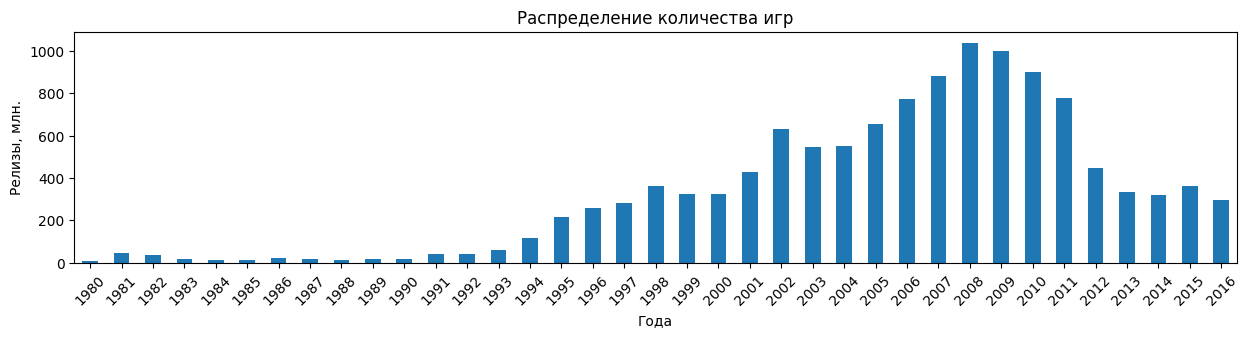

In [32]:
df_games_count.groupby('year_of_release')['name'].count().plot.bar(figsize = (15,3), rot=45)
plt.xlabel('Года')
plt.ylabel('Релизы, млн.')
plt.title('Распределение количества игр')
plt.show();

В начале своей истории рынок компьютерных игр не очень большой, тк еще не существовало массового распространения домашних компьютеров и приставок в том виде как мы их знаем сейчас. Одной из главных вех принято считать появление Atari 2600  в 1977 году  приставка с картриджами). Чуть позже со своими приставками на рынок вышли будущие крупнейшие разработчики Nintendo, Sega и Sony. В 1990-е годы происходит настоящий рассвет в компьютерных играх: переход к полигональной графике (3D), выход игр на CD(1994),  появление нескольких новых жанров - шутер от первого лица(1994), стратегия в реальном времени(1992), MMO(1997). Легко вспоминаются прорывные игры Doom,  eed for Speed, Final Fantasy.  
Компания Sony выпускает свою первую, консоль PlayStation в 1994 году. В следующем году уже проводится первая специализированная выставка индустрии - Electronic Entertainment Expo (E3).
В 2000-е продолжают развиваться технологии: мультиплеерные механики, переход в онлайн. В 2002 году на рынке появляется Microsoft с консолью Xbox. Так же отметим развитие онлайн магазинов для покупки игр. В июле 2004 года число пользователей Xbox Live достигло 1 миллиона, а Steam в 2004 почти эксклюзивно распространял Half-Life 2 (и другие популярные игры Valve) и в 2005 там появились игры и сторонних разработчиков. 
В 2004 году выходит игра Far Cry и задаёт новые стандарты качества в компьютерной графике, так же создана игра World of Warcraft, которая является самой популярной онлайн игрой. 	В 2004 поступают в продажу популярные портативные консоль Nintendo DS, PlayStation Portable.
Появляются и новые домашние консоли: в 2005 Xbox 360, 2006 году - PlayStation 3 и Nintendo Wii. На рынке к этому моменту появились все основные игроки и настоящая конкуренция, которая только подстёгивает развитие. 
В 2008 году случается мировой кризис, но это не останавливает мировую индустрию, а лишь немного снижает объемы, так же 2008 год становится годом возрождения классики, когда многие легендарные серии получают продолжение (например, Fallout 3 и Grand Theft Auto IV).  
Следующее поколение консолей выпадает на 2013 год (PlayStation 4, Xbox One). С выпуском Wii U в 2012 году компания впервые понесла убытки с момента своей переориентации на видеоигры.В 2015 году появились новости о консоли «NX», которую разрабатывают Nintendo , она описывалась как «совершенно новая концепция гибридного устройства». 

Рассмотрим как менялись объемы продаж за представленный в данных период. 

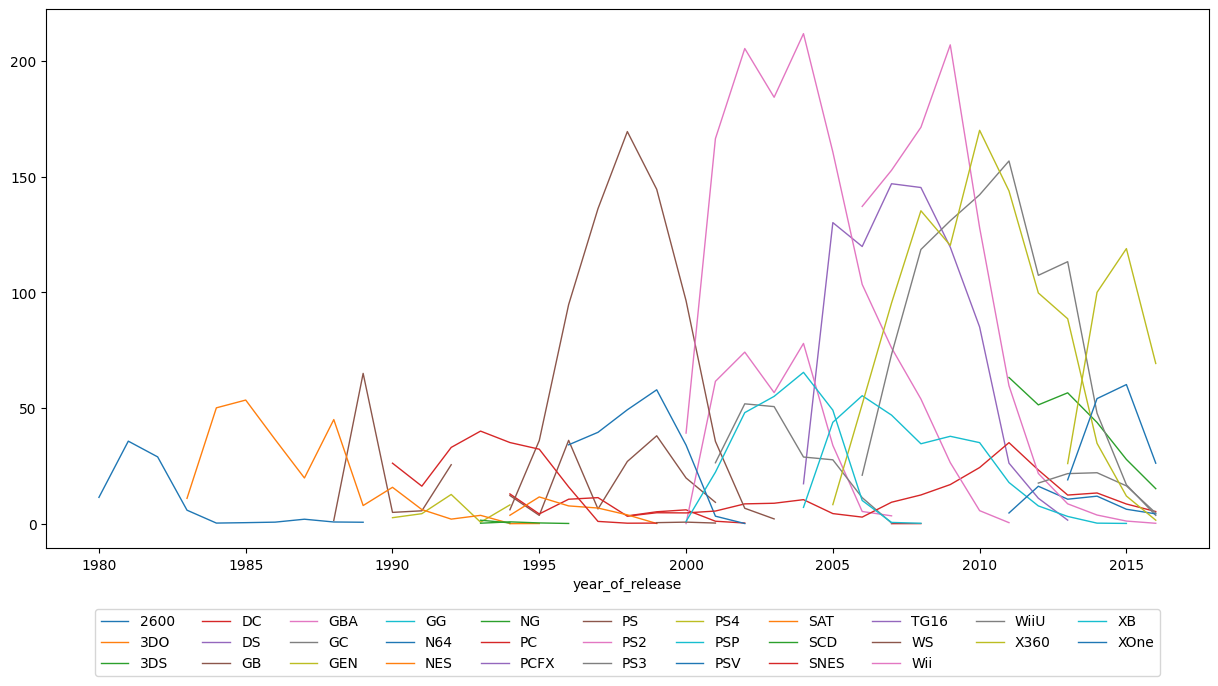

In [33]:
df.pivot_table(index=['year_of_release'], columns=['platform'], values='sales_total', aggfunc='sum')\
    .plot(style='-', kind='line',linewidth=1, figsize=(15,7)).legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol=11);

На гарафике выше мы можем увидеть характерный период за который появляются новые и исчезают старые платформы, он составляет около 7-10 лет. Особенно хорошо виден провал в 2008-2009, когда на графике видны только лидеры, а после 2010 роявляются новые платформы. Рассмотрим их по отдельности.

Найдём 10 платформ с лидерами рынка по продажами.

In [34]:
sales_by_platform=df.pivot_table(\
    index=['platform'], values='sales_total', aggfunc='sum')\
    .reset_index().sort_values(by='sales_total',ascending=False\
    ).head(10)
display(sales_by_platform)
top_sales=sales_by_platform['platform'].tolist()
display(top_sales)

,platform,sales_total
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Снова построим график продаж.

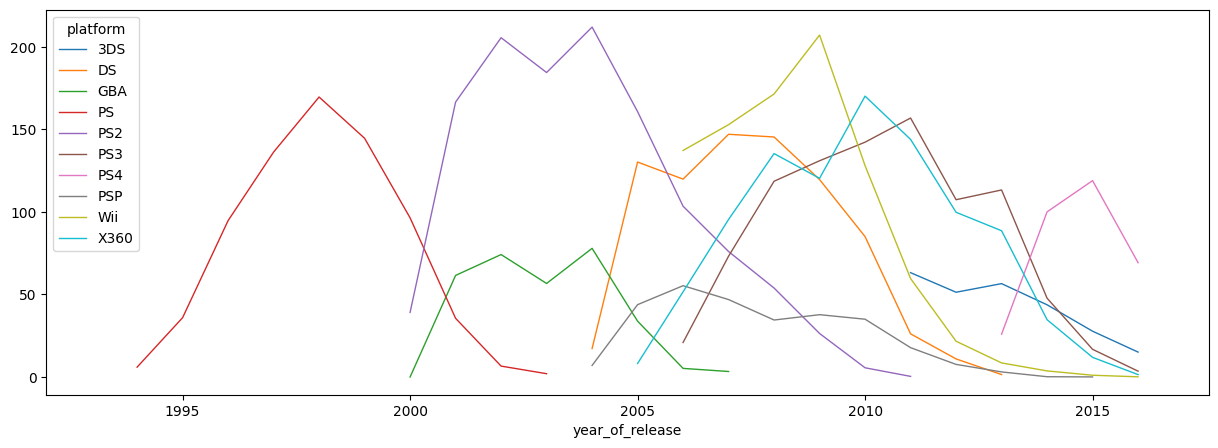

In [35]:
df.query('platform in @top_sales').pivot_table(
    index=['year_of_release'], columns=['platform'], values='sales_total', aggfunc='sum')\
    .plot(style='-', kind='line',linewidth=1, figsize=(15,5)).set_xlim([1992, None]);

На графике видно, что к 2005 PS прекратила и GBA почти прекратила выпускать игры. После 2005 наоборот основные игроки рынка начали выпускать всё больше игр. В 2010 снова наблюдается значительный спад. Наиболее активно выпускают игры для PS3 и X360. К 2013 прекращают выпускать игры на платформах PS2, DS, начинают выпускать на PS4, сокращается выход на PSP.Для платформы PC наблюдается стабильность продаж с 90х и  заметный подъемом в 2010 году. Перид последних 5 лет наиболее интересен, тк видно, что платформы начинают устаревать к текущему моменту.

Узнаем сколько в среднем лидеры выпускают игры на одной платформе.

In [36]:
display(df.query('platform in @top_sales').groupby('platform')['year_of_release'].nunique().mean())

9.7

Посмотрим отличается ли срок жизни остальных платформ.

In [37]:
display(df.query('platform not in @top_sales').\
        groupby('platform')['year_of_release']\
        .nunique().mean())

6.714285714285714

Так же построим график для всех кроме лидеров.

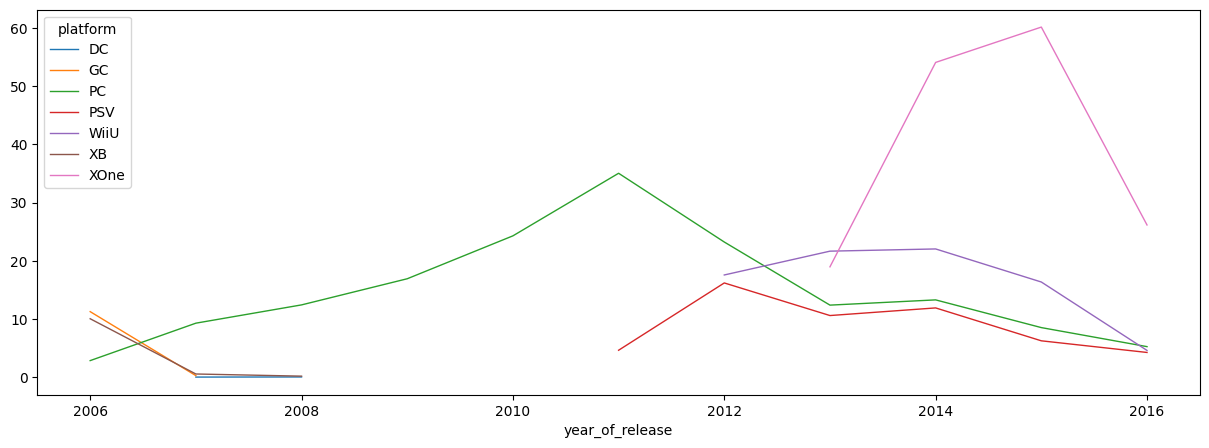

In [38]:
df.query('platform not in @top_sales and year_of_release>2005').pivot_table(
    index=['year_of_release'], columns=['platform'], values='sales_total', aggfunc='sum')\
    .plot(style='-', kind='line',linewidth=1, figsize=(15,5));

На графике мы видим, что после 2010 года на рынке осталось не так много платформ. Таким образом мы приходим к выводу, что наиболее оптимальный период для дальнейшего рассмотрения 5 лет. В таком периоде будет четко видно нарастает ли популярность платформы или падает - эти данные помогут построить прогноз на 2017 год.

In [39]:
df_5_years=df.query('year_of_release>=2012')

In [40]:
df_5_years.pivot_table(
    index=['year_of_release'], columns=['platform'], \
    values='sales_total', aggfunc='sum',\
    fill_value =' ',margins=True, margins_name='All')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
year_of_release,,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,,7.69,16.19,21.71,17.56,99.74,,355.83
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96,361.24
2014,43.76,,13.28,47.76,100.0,0.24,11.9,3.75,22.03,34.74,54.07,331.53
2015,27.78,,8.52,16.82,118.9,0.12,6.25,1.14,16.35,11.96,60.14,267.98
2016,15.14,,5.25,3.6,69.25,,4.25,0.18,4.6,1.52,26.15,129.94
All,194.61,12.55,62.65,288.78,314.14,11.19,49.18,35.37,82.19,236.54,159.32,1446.52


Из сводной таблицы видно, что на плафтформе 'DS' игры не выходили с 2014 года. Тк данные за 2016 год у нас не полные, то отсутсвие продаж в 2016 году еще не окончательное.
Исключим 'DS' из наших данных.

In [41]:
df_5_years=df_5_years.query('platform != "DS"')
df_5_years_platforms=df_5_years['platform'].unique().tolist()
df_5_years['platform'].nunique()

10

Всего у нас осталовь 10 платформ и данные за период с 2012 по 2016. Посмотрим топ лидеров по продажам за весь период.

In [42]:
df_5_years.pivot_table(index='platform', values='sales_total', aggfunc=['sum']).\
sort_values(by=('sum','sales_total'),ascending=False).\
droplevel(0,axis=1).transpose()

platform,PS4,PS3,X360,3DS,XOne,WiiU,PC,PSV,Wii,PSP
sales_total,314.14,288.78,236.54,194.61,159.32,82.19,62.65,49.18,35.37,11.19


In [43]:
top_5_5_y=['PS4','PS3','X360','3DS','XOne']

Среди лидеров у нас оказались платформы принадлежащие Playstation (поколения 'PS4','PS3','PSV','PSP'), Xbox (X360' и'XOne'), Nintendo ('3DS', 'Wii', 'WiiU'), а так же самая долгоживущая платформа PC.
Так же посмотрим как распределились доли в продажах 2016 года. Лидирует  PS4 с подавляющей остальные платформы долей, за ней сразу XOne, далее 3DS.

In [44]:
pivot_sales_last=df_5_years.query('year_of_release ==2016').\
pivot_table(index='platform', values='sales_total', aggfunc=['sum']).\
sort_values(by=('sum','sales_total'),ascending=False)\
.droplevel(1,axis=1).reset_index().\
rename(columns={'sum':'sales_2016_total'})

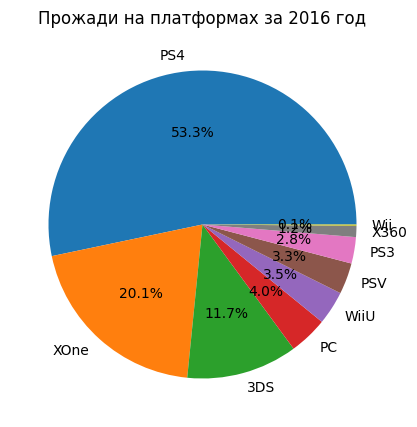

In [45]:
plt.figure(figsize=(5, 5)) 
plt.pie(pivot_sales_last['sales_2016_total'], labels=pivot_sales_last['platform'], autopct='%1.1f%%')
plt.title('Прожади на платформах за 2016 год')
plt.show()

Как и в прошлый раз построим графики продаж для двух категорий - топ 5 и остальные.
Мы видим что самые популярные платформы к  PS4, далее XOne, далее 3DS.  
PS4 и XOne имеют восходящий тренд в 2015 (и уже имеют продажи в 2016), поэтому можно сказать что это две самые перспективные платформы, срок их жизни пока не истек. Их предешествующие версии PS3 и X360 продолжат быстро терять популярность.  
3DS была на пике популярности в 2011 году и теряет популярность, но даже при падении продаж в 2 раза, еще 1 год она будет приносить хорошую прибыль.   
Платформа WiiU появилась  в 2012 году, между 2014 и 2015 незначительный спад популярности, полагаем что при сроке жихни в 6 лет, она будет популярна минимум еще год.  
Отдельно стоит отметить платформу 'PC', как мы помним по предыдущим визуализациям эта платформа дольше всех на рынке и имеет волнообразный график популярности.  
Педшественница WiiU -  Wii уже в 15 году значительно потеряла популярность и входит в тройку наименее популярных платформ, продолжающих терять продажи, вместе с PSP и PSV.

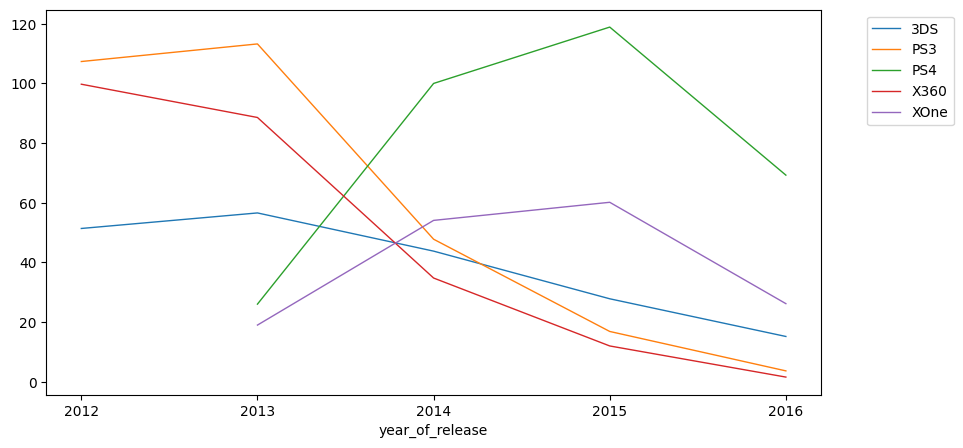

In [46]:
df_5_years.query('platform in @top_5_5_y').pivot_table(
    index=['year_of_release'], columns=['platform'], values='sales_total', aggfunc='sum')\
    .plot(style='-', kind='line',linewidth=1, figsize=(10,5),)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xticks(df_5_years['year_of_release'].sort_values().unique().tolist())
plt.show()

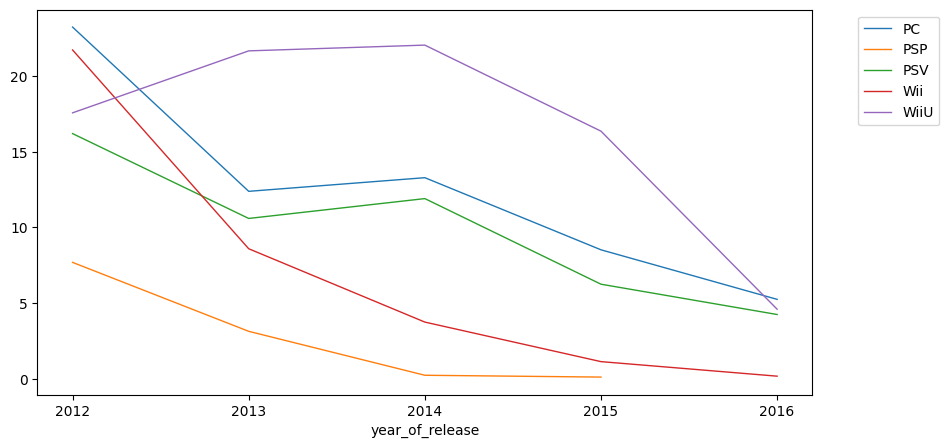

In [47]:
df_5_years.query('platform not in @top_5_5_y').pivot_table(
    index=['year_of_release'], columns=['platform'], values='sales_total', aggfunc='sum')\
    .plot(style='-', kind='line',linewidth=1, figsize=(10,5),)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xticks(df_5_years['year_of_release'].sort_values().unique().tolist())
plt.show()

Итого на наш взгляд потенциально прибыльных платформ 3 - 'PS4','3DS','XOne'.  Так же дополнительно можно отметить 'PC.

In [48]:
best_pl=['XOne','PS4','3DS','PC','WiiU']
df_best_pl_5y=df_5_years.query('platform in @best_pl')

Построим диаграммы «ящик с усами» по глобальным продажам игр в разбивке по платформам за 5 лет.Нам понадобятся 2 его версии - чтобы рассмотреть выбросы и основные статистики. По выбросам видно, что игр блок-бастеров очень много на всех платформах, особенно у 3DS, PS4, PS3, PC, XOne.

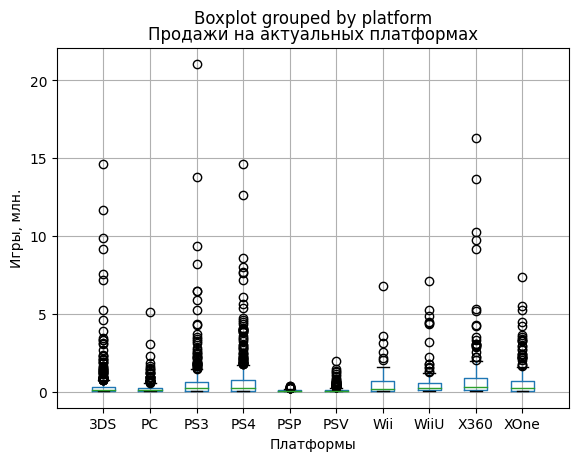

In [49]:
df_5_years[['platform', 'sales_total']].boxplot(column='sales_total', by='platform');
plt.xlabel('Платформы')
plt.ylabel('Игры, млн.')
plt.title('Продажи на актуальных платформах')
plt.xlim(0, 11)
plt.show();

По медианным продажам: тройка лидеров- X360, WiiU, XOne, PS4, PS3, тройка последних - PC,PSV,PSP.  
На диаграмме мы видим, что медианные значения для 3х из 5 лидеров по объему продаж ('PS4','PS3','X360','3DS','XOne') находятся приблизительно в одной области (0,20 -0,22 млн).   
По объемам продаж между 25 и 75 перцентилями сравнимы: 'PS3','PS4','X360','XOne','Wii','WiiU'.  
По колличеству выпускаемых игр потенциально прибыльные плаформы расположись следующим образом:'3DS', 'PS4', 'PC', 'XOne', 'WiiU'.  

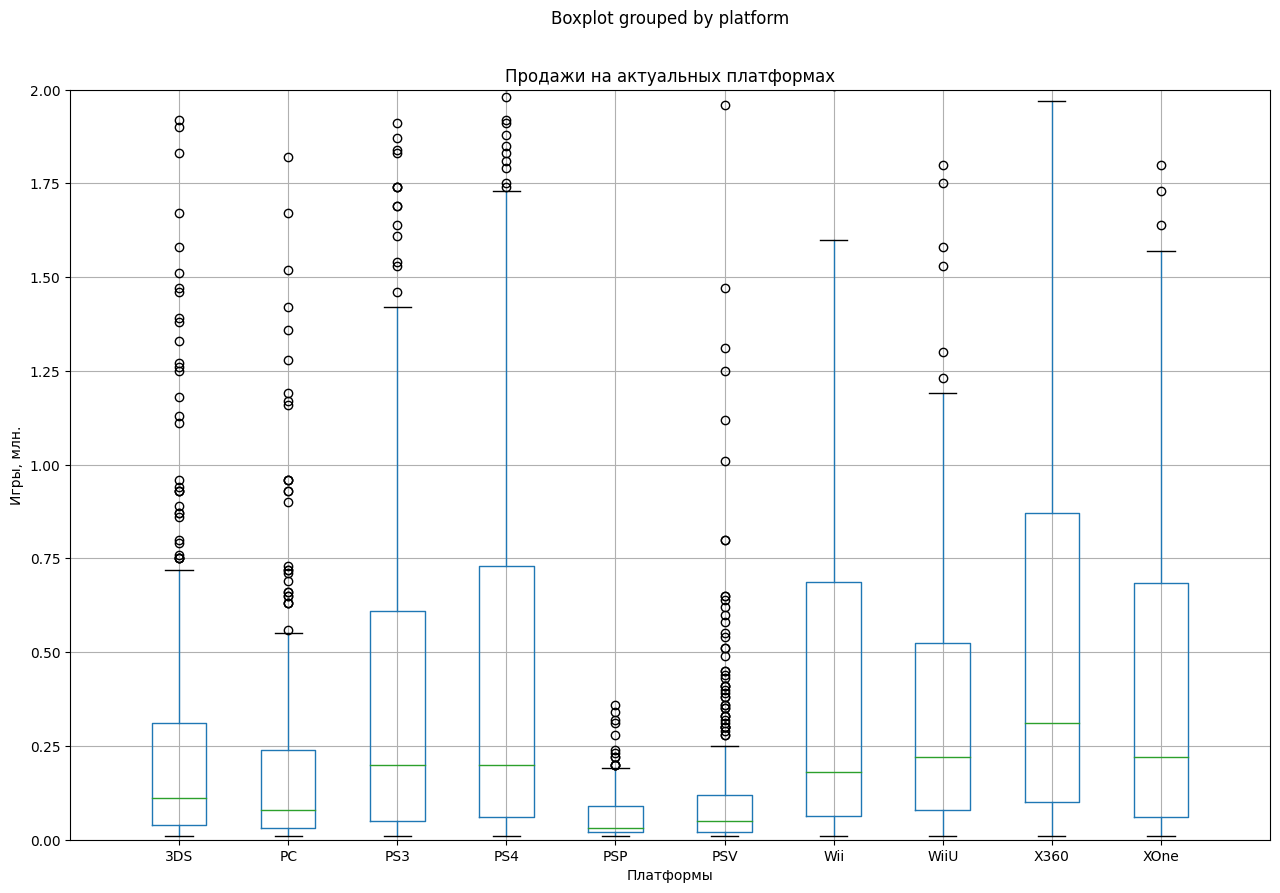

In [50]:
df_5_years[['platform', 'sales_total']].boxplot(column='sales_total', by='platform',figsize=(15,10));
plt.xlabel('Платформы')
plt.ylabel('Игры, млн.')
plt.title('Продажи на актуальных платформах')
plt.xlim(0, 11)
plt.ylim(0, 2)
plt.show();

In [51]:
df_5_years.pivot_table(values='sales_total', index=['name'],columns='platform').\
describe().loc[['count','50%']]

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,396.00,250.00,492.0,392.0,173.00,411.00,54.00,147.00,292.00,247.00
50%,0.11,0.08,0.2,0.2,0.03,0.05,0.18,0.22,0.31,0.22


Посмотрим как влияют на продажи платформы отзывы пользователей и критиков на примере одной из платформ. 
Выберем платформу с наибольшим колличеством отзывов.

In [52]:
df_best_pl_5y.groupby('platform')[['critic_score','user_score']].count()\
.sort_values('user_score',ascending=False).reset_index()

,platform,critic_score,user_score
0,PS4,252,257
1,PC,198,206
2,XOne,169,182
3,3DS,104,114
4,WiiU,90,100


На графике есть видимая корреляция для оценки критиков и почти нет корреляции для оценки игроков. 
Проверим эта наблюдение с помощью метода corr().

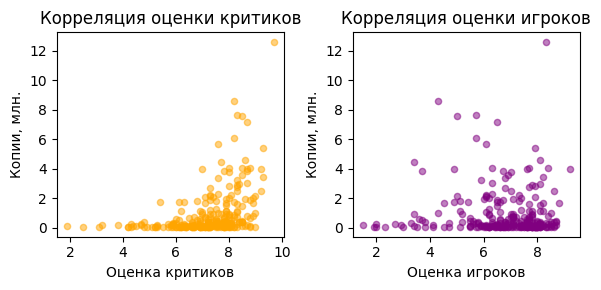

In [53]:
df_PS4_5y= df_best_pl_5y.query('platform=="PS4"')
fig, axs = plt.subplots(1, 2, figsize=(6,3))

df_PS4_5y.plot(kind='scatter',x='critic_score',y='sales_total',color='#FFA500',alpha=0.5, ax=axs[0]);
axs[0].set_title('Корреляция оценки критиков'); 
axs[0].set_xlabel('Оценка критиков'); 
axs[0].set_ylabel('Копии, млн.');

df_PS4_5y.plot(kind='scatter', x='user_score', y='sales_total',color='#800080',alpha=0.5, ax=axs[1]);
axs[1].set_title('Корреляция оценки игроков'); 
axs[1].set_xlabel('Оценка игроков'); 
axs[1].set_ylabel('Копии, млн.');

plt.tight_layout();plt.show()

In [54]:
corr_critic = df_PS4_5y['sales_total'].corr(df_PS4_5y['critic_score'])
corr_user =df_PS4_5y['sales_total'].corr(df_PS4_5y['user_score'])
print('Корреляция оценки критиков и продаж PS4:',corr_critic.round(4))
print('Корреляция оценки игроков и продаж PS4:',corr_user.round(4))

Корреляция оценки критиков и продаж PS4: 0.4066
Корреляция оценки игроков и продаж PS4: -0.032


Данные коэфициенты говорят о том, что есть связь между оценками и объемом продаж (но не обязательно одно является следствием другого). Проверим для остальных платформ наблюдаем ли мы такие же связи.

In [55]:
df_rest_5y= df_best_pl_5y.query('platform!="PS4"')
df_rest_plat=df_rest_5y['platform'].unique().tolist()

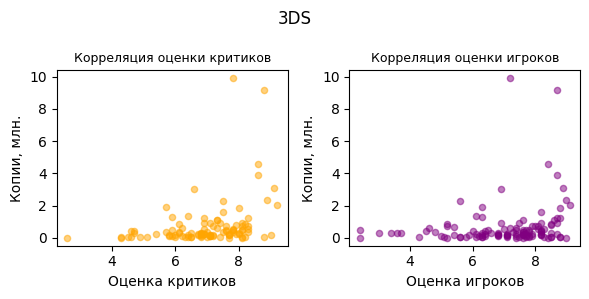

 
Корреляции продажи и оценки критиков  0.321,    продажи и оценки игроков 0.198


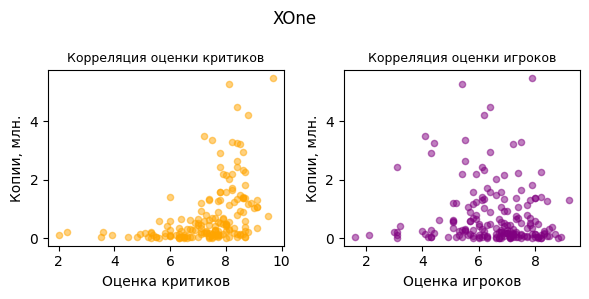

 
Корреляции продажи и оценки критиков  0.417,    продажи и оценки игроков -0.069


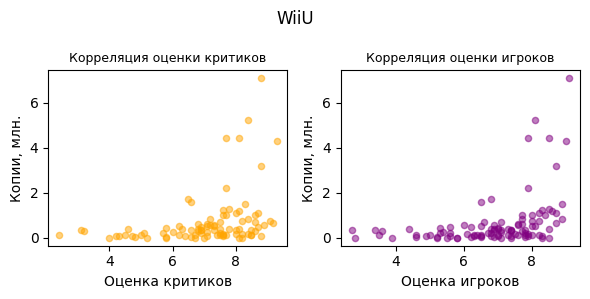

 
Корреляции продажи и оценки критиков  0.348,    продажи и оценки игроков 0.4


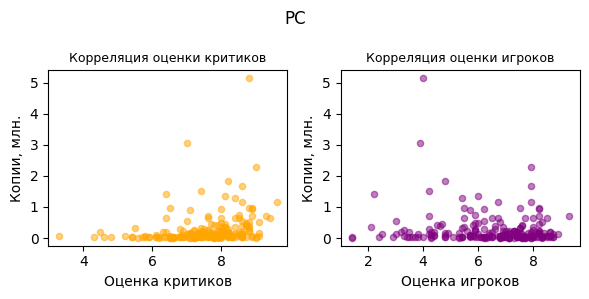

 
Корреляции продажи и оценки критиков  0.237,    продажи и оценки игроков -0.122


In [56]:
for pl in df_rest_plat:

    fig, axs = plt.subplots(1, 2, figsize=(6,3))
    fig.suptitle(pl, fontsize=12)
    
    df_rest_5y[df_rest_5y['platform']==pl]\
    .plot(kind='scatter', x='critic_score', y='sales_total',color='#FFA500',alpha=0.5, ax=axs[0]);
    axs[0].set_title('Корреляция оценки критиков', fontsize=9); 
    axs[0].set_xlabel('Оценка критиков'); 
    axs[0].set_ylabel('Копии, млн.');
    
    df_rest_5y[df_rest_5y['platform']==pl]\
    .plot(kind='scatter', x='user_score', y='sales_total',color='#800080',alpha=0.5, ax=axs[1]);
    axs[1].set_title('Корреляция оценки игроков', fontsize=9); 
    axs[1].set_xlabel('Оценка игроков'); 
    axs[1].set_ylabel('Копии, млн.');
   
    plt.tight_layout();plt.show()
    
    corr_critic = df_rest_5y.loc[df_rest_5y['platform']==pl,'sales_total']\
    .corr(df_rest_5y.loc[df_rest_5y['platform']==pl,'critic_score'])
    corr_user = df_rest_5y.loc[df_rest_5y['platform']==pl,'sales_total']\
    .corr(df_rest_5y.loc[df_rest_5y['platform']==pl,'user_score'])
    
    print(f' \nКорреляции продажи и оценки критиков  {round(corr_critic,3)},\
    продажи и оценки игроков {round(corr_user,3)}')

Мы выяснили, что для XOne и PS4 наблюдается значительная корреляция для оценки критиков, 3DS и WiiU - умеренная.
Для WiiU так же наблюдается сильная зависимость для оценки игроков. Нельзя назвать эти оценки стабильными, но возможно дело в объемах продаж, которыми располагают только два лидера рынка.

Рассмотрим общее распределение игр по жанрам.   
На графиках ниже хорошо видно, что самый продаваемый и по колличеству и объему жанр это "Action". Следом идут жанры "Shooter" и "Role-Playing", но объем продаж больше у первого, а встречается чаще второй.  
Однако по медианным продажам лидеры "Shooter", "Sports", "Platform", в среднем игры этих жанров имеют более высокие объёмы, без учёта неординарных игр, которые являются блок-бастерами.  
Самые низкие объемы продаж и медианные продажи у жанров "Puzzle", "Strategy", "Adventure". 

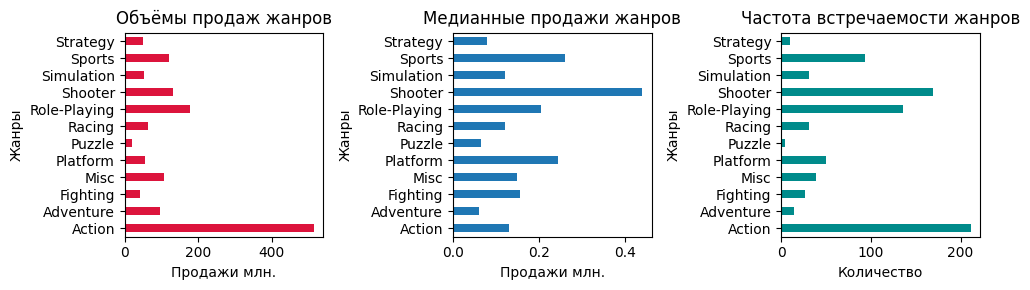

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
df_best_pl_5y.groupby('genre')['name'].count().\
            plot(kind='barh',figsize=(10,3),color='crimson',ax=axs[0]);
axs[0].set_title('Объёмы продаж жанров'); 
axs[0].set_xlabel('Продажи млн.'); 
axs[0].set_ylabel('Жанры');

df_best_pl_5y.groupby('genre')['sales_total'].median().\
            plot(kind='barh',figsize=(10,3),ax=axs[1]);
axs[1].set_title('Медианные продажи жанров'); 
axs[1].set_xlabel('Продажи млн.'); 
axs[1].set_ylabel('Жанры');

df_best_pl_5y.groupby('genre')['sales_total'].sum().\
            plot(kind='barh',figsize=(10,3),color='darkcyan',ax=axs[2]);
axs[2].set_title('Частота встречаемости жанров'); 
axs[2].set_xlabel('Количество'); 
axs[2].set_ylabel('Жанры');

plt.tight_layout();plt.show()

Одновременно общий объем рынка падaет с 2014 года. Распределение объёмов по годам можно увидеть по сводной таблице ниже.

In [60]:
df_best_pl_5y.pivot_table(index=['year_of_release'], values='sales_total',aggfunc='sum').transpose()

year_of_release,2012,2013,2014,2015,2016
sales_total,92.14,135.55,233.14,231.69,120.39


Так же стоит заметить, что от года к году предпочтения игроков меняются. Жанр "Action" самый популярный на протяжениии 5 лет, но к 2015 теряет в объеме. "Shooter" наоборот приобрёл в популярности к 2015 году и по 2016 году пока лидирует. "Role-Playing" сохраняет предыдущие объемы в 2015 году и в 2016 уже имеет следующий после "Action" объем продаж. По данным 2016 года видно, что "Sports" продолжает набирать популярность, как и в прошлыйх годах. 

In [61]:
genre_by_year_piv=df_best_pl_5y.pivot_table(\
                        index='year_of_release', values='sales_total',columns='genre', aggfunc='sum')
genre_by_year_piv

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,21.65,1.33,0.45,7.45,15.65,0.96,1.05,21.67,5.03,11.51,4.41,0.98
2013,29.39,1.88,1.52,7.81,16.80,0.96,5.48,27.76,19.80,7.48,11.83,4.84
2014,72.66,2.73,12.70,12.00,8.01,1.40,14.08,34.45,43.60,5.50,25.14,0.87
2015,60.66,5.33,7.08,9.05,5.92,0.71,7.91,34.99,62.71,4.90,30.62,1.81
2016,26.75,3.09,4.20,1.95,3.02,NaN,2.79,16.51,38.16,1.88,21.00,1.04


Text(0, 0.5, 'Объем продаж')

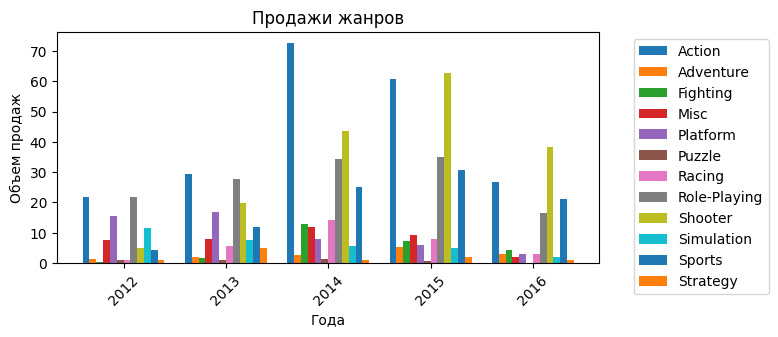

In [62]:
genre_by_year_piv.plot(style='-', kind='bar',linewidth=1, figsize=(7,3),rot=45,width=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title('Продажи жанров')
plt.xlabel('Года') 
plt.ylabel('Объем продаж')

### Вывод 2

Мы рассмотрели и увидели характерный период в 7-10 лет, за который появляются новые и исчезают старые платформы. Мы заметили, что график расчет скачками и пришли к выводу, что с интервалом 3-5 лет происходят ключивые изменения на рынке (особенно хорошо виден провал в 2008-2009).  
Мы рассмотрели как менялись продажи для 10 платформ с лидерами рынка и пришли к выводу, что период последних 5 лет наиболее интересен для дальнейшего рассмотрения, тк видно, что платформы-лидеры начинают устаревать (срок жизни 12 лет) и появляются новые платформы( срок жизни 5 лет). Так же мы исключили платформу Искючим 'DS' из наших данных, поскольку на ней игры не выходили с 2014 года.   
Итого у нас осталось 10 лидирующих платформ и данные за период с 2012 по 2015. Топ лидеров по продажам составили платформы, принадлежащие Playstation (поколения 'PS4','PS3','PSV','PSP'), Xbox (X360' и'XOne'), Nintendo ('3DS', 'Wii', 'WiiU'), а также самая долгоживущая платформа PC, первое место среди которых у PS4, а последнее у PSP.   
По графику продаж мы сделали вывод, что PS4 и XOne - это две самые перспективные платформы, тк они имеют восходящий тренд в 2015, уже имеют продажи в 2016, и срок их жизни пока не истек, а их предшествующие версии быстро потеряют популярность.
Платформа 3DS даже при падении продаж в 2 раза, будет приносить хорошую прибыль.
При сроке жизни в 6 лет платформа WiiU она будет популярна минимум еще год, однако если рассматривать лишь незначительное падение продаж в 2014-2015 году можно предположить, что срок её жизни будет дольше. Отдельно стоит отметить платформу 'PC', как мы помним по предыдущим визуализациям ,она имеет волнообразный график популярности и её никак нельзя считать безнадёжной. Итого на наш взгляд топ-3 перспективных платформ: 'PS4','XOne','3DS'.  
На диаграмме «ящик с усами» по глобальным продажам игр в разбивке по платформам мы видим, что медианные значения для 3х из 5 лидеров находятся приблизительно в одной области (0,20 -0,22 млн). По количеству выпускаемых игр на первом месте 3DS, по средним продажам - XOne и WiiU. Так же заметно, что по объему выпускаемых игр сравнимы PS4 и XOne, но больше всего покупают игры на PS4. Самые умеренные объемы выпускаемых игр в среднем на PC (25-75 перцентили). У 3DS и PC много продаж игр которые выделяются из основной массы.  
Мы рассмотрели влияние отзывов пользователей и критиков на продажи. Мы выяснили, что для XOne и PS4 наблюдается значительная корреляция для оценки критиков, 3DS и WiiU - умеренная. Для WiiU так же наблюдается сильная зависимость для оценки игроков. Нельзя назвать эти оценки стабильными, но возможно дело в объемах продаж, которыми располагают только два лидера рынка. Данные коэфициенты говорят о том, что есть связь между оценками и объемом продаж, но не обязательно одно является следствием другого.   
Мы рассмотрели и распределение игр по жанрам. Самый продаваемый и по количеству и объему жанр это "Action". Следом идут жанры "Shooter" и "Role-Playing", но объем продаж больше у первого, а встречается чаще второй. Однако по медианным продажам лидеры "Shooter", "Sports", "Platform", в среднем игры этих жанров имеют более высокие объёмы, без учёта неординарных игр, которые являются блок-бастерами. Самые низкие объемы продаж и медианные продажи у жанров "Puzzle", "Strategy", "Adventure".   
Благодаря сводным данным, мы узнали о его нисходящем тренде объема рынка с 2014 года. Так же отметили, "Action" (лидер за 5 лет) к 2015 теряет в объеме, "Shooter" наоборот приобретает в популярности с 2015. "Role-Playing" сохраняет предыдущие объемы даже по неполным данным 2016 года, а "Sports" продолжает набирать популярность, как и в прошлых годах.


## 3. Портрет пользователя для регионов

В наших данные есть присутствует раздление по регионам. Всего  у нас 4 региона, названия которых было сокращены для уобства наименования: NA -Свеверная Америка, EU-Европпа, JP-Япония и прочие. Изучим его подробнее 3 известных региона.

In [63]:
df_5_years.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.3,5.3,M,13.79


Посмотрим какие самые популярные платформы в каждом регионе(топ-5).

In [64]:
na_5y = df_5_years.groupby('platform')['na_sales'].sum().\
        sort_values(ascending=False).reset_index().head(5)
eu_5y = df_5_years.groupby('platform')['eu_sales'].sum().\
        sort_values(ascending=False).reset_index().head(5)
jp_5y = df_5_years.groupby('platform')['jp_sales'].sum().\
        sort_values(ascending=False).reset_index().head(5)

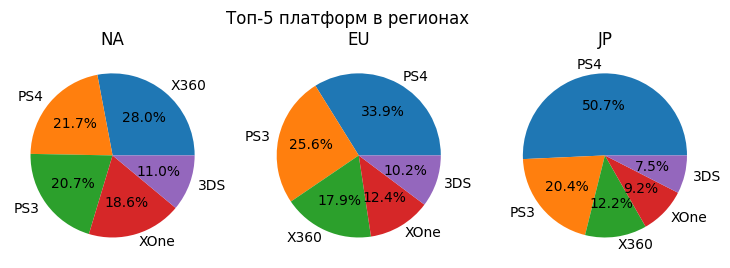

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))  # Создаем фигуру с тремя подграфиками (axes)

axs[0].pie(na_5y['na_sales'],labels=na_5y['platform'], autopct='%1.1f%%')
axs[1].pie(eu_5y['eu_sales'],labels=eu_5y['platform'], autopct='%1.1f%%')
axs[2].pie(jp_5y['jp_sales'],labels=eu_5y['platform'], autopct='%1.1f%%')

# Задаем названия для диаграмм
axs[0].set_title('NA')
axs[1].set_title('EU')
axs[2].set_title('JP')

# Задаем общее название для фигуры
fig.suptitle('Топ-5 платформ в регионах')

plt.show()

Изучив диаграммы мы можем увидеть региональную специфику за 5 лет.  
Для региона NA: самая популярная платформа - X360, замыкает топ -3DS.  
Для региона EU: лидирует PS4, замыкает 3DS и чуть выше находится XOne.  
Для региона JP:50% рынка среди лидеров занимает PS4, XOne и 	3D -имеет кратно меньшую долю.   

PlayStation, c двумя поколениями PS3 и PS4, преобладает на рынках EU и JP. Два поколения платформ Xbox - XOne иX360, лишь немного превосходит PlayStation по объемам на рынке NA. У платформы 3DS почти одинаковые доли на рынках NA и JP. 9

Рассмотрим самые популярные жанры (топ-5).

In [66]:
na_5y_genre = df_5_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_5y_genre = df_5_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_5y_genre = df_5_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

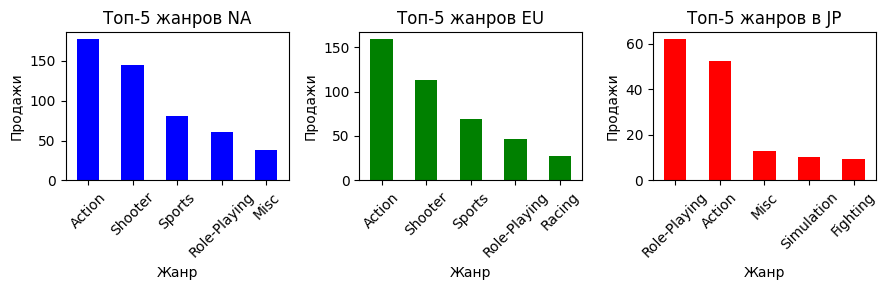

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

na_5y_genre.plot(kind='bar',ax=axs[0], color='blue',rot=45, title='Топ-5 жанров NA')
axs[0].set_ylabel('Продажи')
axs[0].set_xlabel('Жанр')

eu_5y_genre.plot(kind='bar', ax=axs[1], color='green',rot=45, title='Топ-5 жанров EU')
axs[1].set_ylabel('Продажи')
axs[1].set_xlabel('Жанр')

jp_5y_genre.plot(kind='bar', ax=axs[2], color='red',rot=45, title='Топ-5 жанров в JP')
axs[2].set_ylabel('Продажи')
axs[2].set_xlabel('Жанр')


plt.tight_layout()
plt.show()

Расположим на одном графике, чтобы было четко видно, что жанры:
- Action как и прежде лидирует во всех регионах, вероятнее всего именно в этом жанре выходили самые интересные игры для любой аудитории.
- Simulation, Fighting пользуются популярностью только в регионе JP, вероятнее всего это культурная особенность характерная для предпочтений в регионе. 
- Racing только в EU, опять же похоже на региональную специфику, тк гонки как вид спорта зародился и процветает в Европе.
- Misc популярен в NA и JP, судя по всему этот жанр заменяет собой Racing. 
- Sports, Shooter популярен в NA и EU

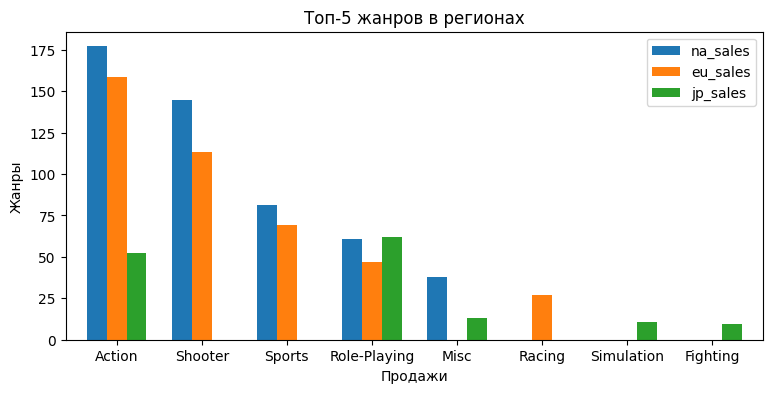

In [68]:
regional_genre = pd.merge(na_5y_genre, eu_5y_genre,on='genre', how='outer')\
.merge(jp_5y_genre,on='genre', how='outer')
ax = regional_genre.plot.bar(figsize=(9, 4),title='Топ-5 жанров в регионах',rot=0,width=0.7)
ax.set_xlabel('Продажи');
ax.set_ylabel('Жанры');

Рассмотрим так же влияние рейтинга ESRB на продажи в регионах. 
Колонка rating содержит пропуски, чтобы не упустить эти значения при рассмотрении заменим значения на текстове "NA"(not applicable).

In [69]:
df_5_years['rating'] =df_5_years['rating'].fillna('N/A')
df_5_years.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,N/A,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,N/A,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.3,5.3,M,13.79


 По сводной таблице ниже, можно заключить, что присовоение рейтинга E10+ существенно влияет на продажи и особенно в регоине JP.
Наибольшие продажи у игр с рейтингом "М" в NA и EU. Игры без рейтинга встречаются в каждом регионе, но в JP объем таких игр подавляющий. Это может объяснить несколькими способами. Во первых тем, что [ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) ориентирована на рынок Америки и Канады, а в Японии другая организация, [CERO](https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization#:~:text=The%20Computer%20Entertainment%20Rating%20Organization,levels%20of%20ratings%20that%20informs), которая определяет рейтинги, следовательно игра может иметь рейтинг CERO и не иметь рейтинга ESRB. Во вторых тем , что в JP много игр которые выпущены только для этого рынка и не представлены в NA и EU.

In [70]:
na_5y_rating = df_5_years.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_5y_rating= df_5_years.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_5y_rating= df_5_years.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
regional_rating=  pd.merge(na_5y_rating, eu_5y_rating,on='rating', how='outer')\
.merge(jp_5y_rating,on='rating', how='outer')
regional_rating

,na_sales,eu_sales,jp_sales
rating,,,
M,231.57,193.96,21.20
E,113.57,112.20,27.96
N/A,100.13,89.32,105.49
E10+,75.09,54.84,8.19
T,66.02,52.96,26.02


### Вывод 3

Мы подробнее изучили специфику в 3х предсталенных регионах и у нас получились следюущие характерные портреты. 

Для Северной Америки (NA)     
- наиболее предпочитаемая платорма: X360(28%), вторая - PS4(21.7%)
- предпочитаемые жанры в порядке убывания: Action, Shooter, Sports, Role-Playing, Misc
- влияние ESRB: наибольшие продажи у игр с рейтингом "М"
  
Для Европы (EU)  
- наиболее предпочитаемая платорма: PS4(33.8%), вторая - PS3(25.7%) 
- предпочитаемые жанры в порядке убывания: Action, Shooter,Sports, Role-Playing, Racing
- влияние ESRB: наибольшие продажи у игр с рейтингом "М"

Для Японии (JP)  
- наиболее предпочитаемая платорма: PS4(50.7%), вторая - PS3(20.4%)
- предпочитаемые жанры в порядке убывания: Role-Playing, Action, Misc, Simulation, Fighting
- влияние ESRB: наименьшие продажи у игр с рейтингом E10+
- лидерами продаж являются игры без рейтинга (в Японии определяет рейтинги организация CERO, а не ESRB)

## 4. Проверка гипотез

Для проверки интересующих нас гипотез  будем использовать подходящийх вариант  t-теста из библиотеки scipy.  
По общепринятой практике нам нужно:
1. Выбрать уровень статистической значимости 0.05;  
2. Сформулировать гипотезы таким образом, чтобы H0 предполагала, что различий нет;  
3. Сделать выборки одинаковыми по размеру;  
4. Провести тест.

### Гипотеза 1

H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1 - средние пользовательские рейтинги платформ Xbox One и PC разные.

In [71]:
df_5y_xbox = df_5_years.query('platform=="XOne"')['user_score'].dropna()
df_5y_pc = df_5_years.query('platform=="PC"')['user_score'].dropna()
print('Размер выборки Xbox One:', df_5y_xbox.count())
print('Размер выборки PC:', df_5y_pc.count())

Размер выборки Xbox One: 182
Размер выборки PC: 206


In [72]:
df_5y_pc_s=df_5y_pc.sample(n=df_5y_xbox.count(), random_state=1, replace=False)
if df_5y_xbox.count()==df_5y_pc_s.count():
    print('Выборки Xbox One и PC равны.')

Выборки Xbox One и PC равны.


In [73]:
alpha = 0.05
results = st.ttest_ind(df_5y_xbox, df_5y_pc_s, equal_var=False)

print('P-значение:', results.pvalue)

print('Среднее Xbox One:', df_5y_xbox.median(),'\nCреднее PC:', df_5y_pc.median())

if results.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу')
else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу')

P-значение: 0.8460336784903755
Среднее Xbox One: 6.8 
Cреднее PC: 6.8
Вывод: не получилось отвергнуть нулевую гипотезу


### Гипотеза 2

H0 - средние пользовательские рейтинги платформ жанров Action и Sports одинаковые  
H1 - средние пользовательские рейтинги платформ жанров Action и Sports разные 

In [74]:
df_5y_action = df_5_years.query('genre=="Action"')['user_score'].dropna()
df_5y_sports = df_5_years.query('genre=="Sports"')['user_score'].dropna()
print('Размер выборки Action:', df_5y_action.count())
print('Размер выборки Sports:', df_5y_sports.count())

Размер выборки Action: 521
Размер выборки Sports: 194


In [75]:
df_5y_action_s=df_5y_action.sample(n=df_5y_sports.count(), random_state=1, replace=False)
if df_5y_action_s.count()==df_5y_sports.count():
    print('Выборки Action и Sports равны.')

Выборки Action и Sports равны.


In [76]:
alpha = 0.05
results = st.ttest_ind(df_5y_action_s, df_5y_sports, equal_var=False)

print('P-значение:', results.pvalue)

print('Среднее Action:', df_5y_action_s.median(),'\nCреднее Sports:', df_5y_pc.median())

if results.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу')
else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу')

P-значение: 3.996519928052604e-16
Среднее Action: 7.1 
Cреднее Sports: 6.8
Вывод: отвергаем нулевую гипотезу


### Вывод 4

Из двух гипотез на основании p-value мы отвергли только одну и пришли к тому что:  
- средние пользовательские рейтинги платформ жанров Action и Sports разные;  
- средние пользовательские рейтинги платформ Xbox One и PC разные.  

## Общий вывод

Нам были предоставлены данные об играх за период с 1980 по 2016 года, мы проделали анализ данных сконцентрировавшись на последних 5 представленных годах.  

Значительный рост продаж игр наблюдался со второй половины 90-х и достиг своего пика в 2008. Далее до 2010 года наблюдалось исчезновение «малых» платформ и доминирование крупных платформ на рынке. Мы выяснили, что для лидеров рынка по объему продаж характерен срок жизни в 12 лет, с пиком популярности примерно на середину этого срока. Для прочих платформ характерный срок жизни 6 лет. Таким образом мы пришли к выводу, что наиболее интересным будет период 5 последних лет, так как будет четко видна динамика продаж, уход с рынка и появление новых платформ.  

Мы составили рейтинг 10 платформ лидеров в порядке убывания: PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, PSP. Как мы можем рынок разделился между компаниями Playstation ('PS4','PS3','PSV','PSP'), Xbox (X360' и'XOne'), Nintendo ('3DS', 'Wii', 'WiiU'), а также самой долгоживущей платформой PC. Проанализировав тренды в продажах, мы определили3 самых перспективных платформы: 'PS4', 'XOne', '3DS', для диверсификации рисков так же можно считать перспективнымой 'PC'.

Мы выяснили, что существует разница по популярности платформ и жанров для регионов и составили характерные портреты для каждого рынка.
PlayStation, c двумя поколениями PS3 и PS4, преобладает на рынках EU и JP. Два поколения платформ Xbox - XOne иX360, лишь немного превосходит PlayStation по объемам на рынке NA. У платформы 3DS почти одинаковые доли на рынках NA и JP. 

Благодаря сводным данным и графикам, мы узнали о его нисходящем тренде объема рынка с 2014 года. Так же отметили, "Action" (лидер за 5 лет) к 2015 теряет в объеме, "Shooter" наоборот приобретает в популярности с 2015. "Role-Playing" сохраняет предыдущие объемы даже по неполным данным 2016 года, а "Sports" продолжает набирать популярность, как и в прошлых годах.  

Жанр Action как и прежде лидирует во всех регионах, вероятнее всего именно в этом жанре выходили самые интересные игры для любой аудитории. Role-Playing интересен так же во всех регионах, но чуть меньше популярен. Sports, Shooter не популярены в Японии, и наоборот популярны Simulation, Fighting - что говорит нам о региональной специфике предпочтений.  Продажи отчасти могут объясняться историческим преобладанием платформ в регионах и основным жанром этих платформ. Например, xbox была консолью на которой появились шутеры и сейчас они на ней популярны. В Японии был всегда популярен "исконный" жанр - JRPG(у нас Role-Playing). 

Мы рассмотрели влияние оценок и рейтингов на продажи и вывели зависимости.
1. Для оценки критиков наблюдается значительная корреляция у XOne и PS4, умеренная - у 3DS и WiiU
2.  Для оценки игроков сильная корреляция у WiiU
3. Наибольшие продажи у игр с рейтингом "М" в NA и EU
4. Присвоение рейтинга E10+ существенно влияет на продажи и особенно в регоине JP.  

В результате проверки предложенных гипотез пришли к тому что:  
- средние пользовательские рейтинги платформ жанров Action и Sports разные;  
- средние пользовательские рейтинги платформ Xbox One и PC разные.   

Жанровое и рейтинговое распределение в разных странах может разниться по неучтённым причинам, например из-за правового регулирования сферы. К тому же оценки пользователей и критиком в данных представлены не настолько подробно, чтобы можно было делать окончательные выводы. Так же напомним, что данные за 2016 год у нас не полные и картина может несколько измениться к концу года.ые.

## Рекомендации

В результате проведенного анализа мы можем дать следующие рекомендации?
1. Акцентировать внимаение стоит на самых перспективных платформы: 'PS4', 'XOne', '3DS'.
2. Игры жанров "Shooter", "Sports", "Platform" имеют наболее высокие продажи, наименее - "Puzzle", "Strategy", "Adventure". Следует закупать игры в первую очередь этих жанров.
3.  В ситуации выбора между играми стоит обращать внимание на оценки критиков для рынков EU и NA и пользователй для рынка JP, прослеживается умеренная взаимосвязь с продажами
4. Рейтинг ESRB актуален для рынков EU и NA, стоит обратить внимание на категории 'M' и 'E'. ESRB не актуален для рынка JP, рекомендуем провести дополнительное исследование рейтинга игр от организации CERO.
5. В предпочетаемых жанрах и платформах присутствует региональная специфика, следует учитывать потртрет потребителя в каждом регионе при распределении средств на рекламные бюджеты (указаны выше). 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc' - жанры предпочитаемые минимум в 2 из 3 представленных регионов.
6. Так каку основная часть рынка разделёна между компаниями Playstation, Xbox, Nintendo, для деферсификации рисков так же рекомендуем предыдущие поколения плафторм, которые имеют хорошие продажи и самую долговерную платфрму'PS3','X360', 'PC'
7.  Поскольку есть информация о том что планируется выход новой платформы Nintendo и учитывая падения продаж для их новейшей платформы, рекомендуем не тратить значительный бюджет на игры для этой платформы, а заложить средства на отложенную покупку игр для будущей консолио".

# Результат ревью:

Я отмечаю адекватный уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python и библиотеки pandas. Это показывает твой уровень владения инструментами.

Ты умело применяешь графические библиотеки (matplotlib), выбираешь для визуализации ровно те типы графиков, которые нужны. Очень хорошо, что оси на графиках (в большинстве графиков!) подписаны и сами они имеют понятные названия.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Мне было просто проверять твой проект, потому что он чётко структурирован, с использованием оглавления. 

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.